In [1]:
%load_ext autoreload

%autoreload 2
import numpy as np
import corner, sys
import getdist
from getdist import plots, MCSamples
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#plt.switch_backend("Qt5Agg")

In [2]:
names = ['1', '2', '3', '4', '5', '6',]
labels = [r'\ln \lambda_0', r'\mu_z', r'\mu_m', r'\sigma_{\ln \lambda, 0}', r'\Omega_m', r'\sigma_8']
settings={'mult_bias_correction_order':0,'smooth_scale_2D':4, 'smooth_scale_1D':4, 'boundary_correction_order':0}

In [3]:
n_cut=6000
where = '/pbs/throng/lsst/users/cpayerne/capish/chains/'
t = np.load(where + f'pinochio_chain_NxMwl_fixed_cosmo_num_params_rm_rel_4_log_normal_poisson_log_scatter_sigma_lnMwl=0.25.pkl', allow_pickle = True)
NxMwl_fix_cosmo = MCSamples(samples=t['flat_chains'][n_cut:],names = names[:-2], 
                    labels = labels[:-2], 
                     settings=settings, 
                     label='NxWL - fixed_cosmology')

t = np.load(where + f'pinochio_chain_N_fixed_cosmo_num_params_rm_rel_4_log_normal_poisson_log_scatter_sigma_lnMwl=0.25.pkl', allow_pickle = True)
N_fix_cosmo = MCSamples(samples=t['flat_chains'][n_cut:],names = names[:-2], 
                    labels = labels[:-2], 
                     settings=settings, 
                     label='N - fixed_cosmology')

t = np.load(where + f'pinochio_chain_Mwl_fixed_cosmo_num_params_rm_rel_4_log_normal_poisson_log_scatter_sigma_lnMwl=0.25.pkl', allow_pickle = True)
Mwl_fix_cosmo = MCSamples(samples=t['flat_chains'][n_cut:],names = names[:-2], 
                    labels = labels[:-2], 
                     settings=settings, 
                     label='Mwl - fixed_cosmology')


Removed no burn in
Removed no burn in
Removed no burn in


In [4]:
markers = {'1': 3.2, '2': 0, '3': 2.2, '4': 0.5, '5':0.30711, '6':.8288 }

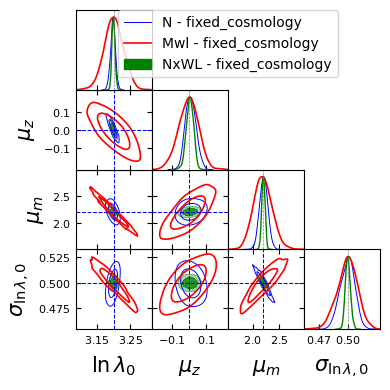

In [5]:
g = plots.get_subplot_plotter(subplot_size=1.)
g.settings.lab_fontsize = 20
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 13
marker_args = {'lw':0.75, 'markersize':0.75, 'ls':'--','color':'b'}
range = {'1':(3.15,3.3) }
g.triangle_plot(
                [N_fix_cosmo, Mwl_fix_cosmo, NxMwl_fix_cosmo,], 
                filled=[False, False, True, False, False], 
                contour_colors = ['b', 'r', 'g', 'k', 'r', 'k' ], 
                contour_ls=['-','-','-', '-', '-'],
                contour_lws=[0.7,1.2,1,1,2],
                legend_fontsize = 10,
                #param_limits = range,
                markers=markers,
                fine_bins = 5,  
                marker_args = marker_args)
plt.savefig(f'/pbs/throng/lsst/users/cpayerne/capish/figures/pinocchio_1000_mocks.png', dpi = 300)

In [6]:
n_cut=10000
where = '/pbs/throng/lsst/users/cpayerne/capish/chains/'
t = np.load(where + f'pinochio_chain_NxMwl_fit_cosmo_num_params_rm_rel_4_log_normal_poisson_log_scatter_sigma_lnMwl=0.25.pkl', allow_pickle = True)
NxMwl_fit_cosmo = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels[:-2], 
                     settings=settings, 
                     label='NxWL - fit_cosmology')

t = np.load(where + f'pinochio_chain_N_fit_cosmo_num_params_rm_rel_4_log_normal_poisson_log_scatter_sigma_lnMwl=0.25.pkl', allow_pickle = True)
N_fit_cosmo = MCSamples(samples=t['flat_chains'][n_cut:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='N - fit_cosmology')

t = np.load(where + f'pinochio_chain_Mwl_fit_cosmo_num_params_rm_rel_4_log_normal_poisson_log_scatter_sigma_lnMwl=0.25.pkl', allow_pickle = True)
add_prior = (t['flat_chains'][:,4] > 0.25)*(t['flat_chains'][:,4] < 0.35)*(t['flat_chains'][:,5] > 0.8)*(t['flat_chains'][:,5] < .85)
Mwl_fit_cosmo = MCSamples(samples=t['flat_chains'][add_prior][1000:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label='Mwl - fit_cosmology')


Removed no burn in
Removed no burn in
Removed no burn in


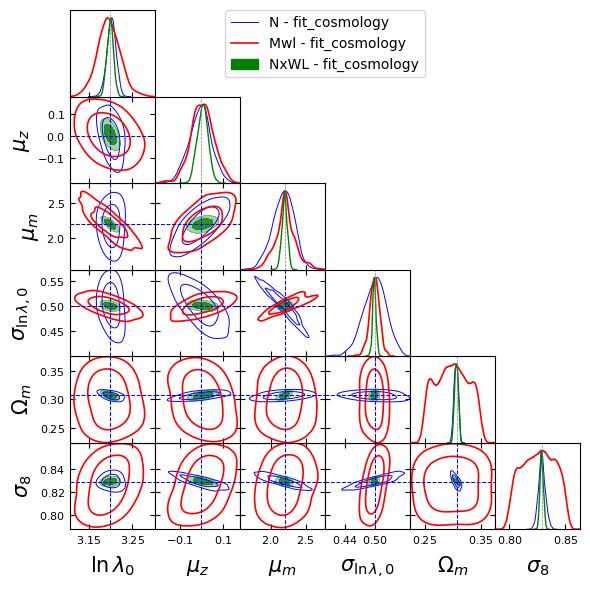

In [ ]:
g = plots.get_subplot_plotter(subplot_size=1.)
g.settings.lab_fontsize = 20
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 13
marker_args = {'lw':0.75, 'markersize':0.75, 'ls':'--','color':'b'}
range = {'1':(3.15,3.3) }
g.triangle_plot(
                [N_fit_cosmo, Mwl_fit_cosmo, NxMwl_fit_cosmo,], 
                 filled=[False, False, True, False, False], 
                contour_colors = ['b', 'r', 'g', 'k', 'r', 'k' ], 
                contour_ls=['-','-','-', '-', '-'],
                contour_lws=[0.7,1.2,1,1,2],
                legend_fontsize = 10,
                markers=markers,
                marker_args = marker_args)
plt.savefig(f'/pbs/throng/lsst/users/cpayerne/capish/figures/pinocchio_Oms8_1000_mocks.png', dpi = 300)